# Image Classification: Coyote vs Fox


This image classifier will attempt to accurately distinguish coyotes from foxes. The dataset features 25 images of coyotes and 25 images of foxes.

In [1]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline

In [2]:
from fastai import *
from fastai.vision import *

In [3]:
bs = 16

Create a new dataset called `Coyote vs Fox` and upload the [coyote_vs_fox.zip](https://github.com/edkahara/fastai/blob/master/lesson%201/datasets/coyote_vs_fox.zip) file.

In [4]:
path = Path('../input/coyote_vs_fox/images')
path

PosixPath('../input/coyote_vs_fox/images')

In [5]:
fnames = get_image_files(path)
fnames[:5]

[PosixPath('../input/coyote_vs_fox/images/Coyote_18.jpg'),
 PosixPath('../input/coyote_vs_fox/images/Fox_21.jpg'),
 PosixPath('../input/coyote_vs_fox/images/Coyote_15.jpg'),
 PosixPath('../input/coyote_vs_fox/images/Coyote_21.jpg'),
 PosixPath('../input/coyote_vs_fox/images/Coyote_25.jpg')]

In [6]:
np.random.seed(2)
pat = re.compile(r'/([^/]+)_\d+.jpg$')

In [7]:
data = ImageDataBunch.from_name_re(path, fnames, pat, ds_tfms=get_transforms(), size=224, bs=bs, num_workers=0).normalize(imagenet_stats)

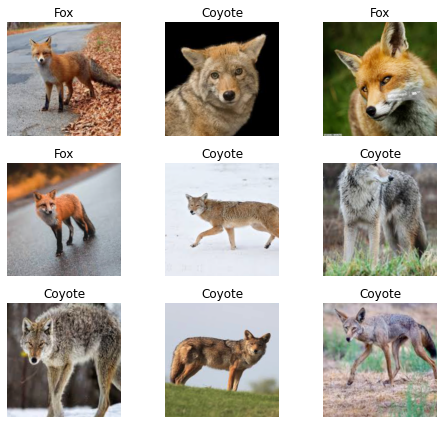

In [8]:
data.show_batch(rows=3, figsize=(7,6))

In [9]:
print(data.classes)
len(data.classes),data.c

['Coyote', 'Fox']


(2, 2)

# Training: resnet34

In [10]:
learn = cnn_learner(data, models.resnet34, metrics=error_rate)

Downloading: "https://download.pytorch.org/models/resnet34-333f7ec4.pth" to /root/.cache/torch/checkpoints/resnet34-333f7ec4.pth


In [11]:
learn.fit_one_cycle(4)

epoch,train_loss,valid_loss,error_rate,time
0,2.078791,1.597618,0.700000,00:01
1,1.320208,0.035649,0.000000,00:00
2,0.964631,0.001338,0.000000,00:00
3,0.715757,0.001268,0.000000,00:00


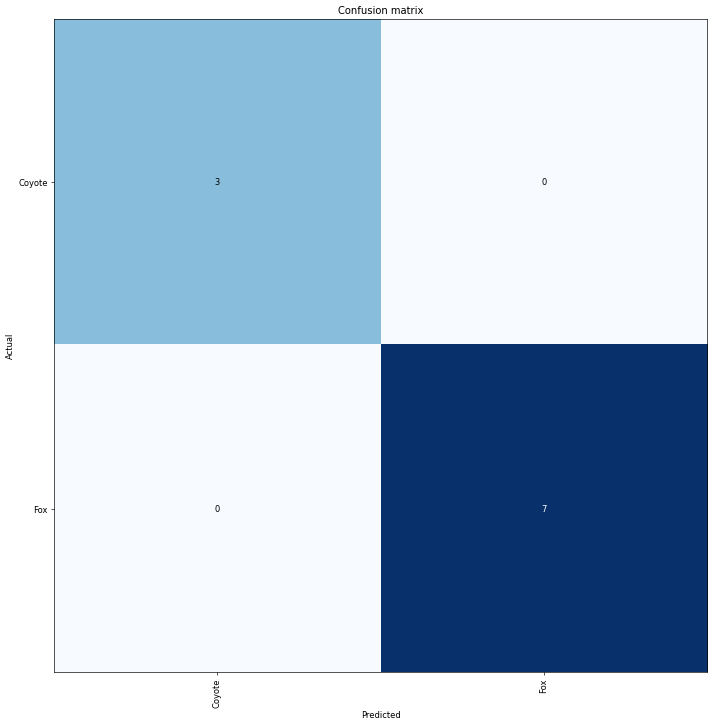

In [12]:
interp = ClassificationInterpretation.from_learner(learn)
interp.plot_confusion_matrix(figsize=(12,12), dpi=60)